# Adjustment Factor分析

KeyError: 'BestIVOL'

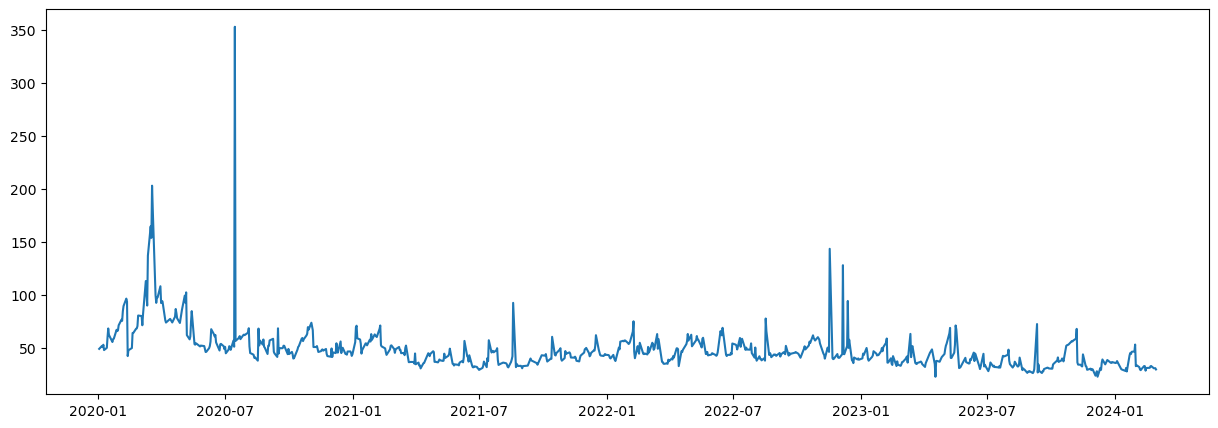

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel数据
file_path = "TF calibration results with call and put/TEVA 0 ¼ 02 01 26 Corp.xlsx"  # 修改为你的文件路径
df = pd.read_excel(file_path)

# 确保Date列是时间格式
df['date'] = pd.to_datetime(df['date'])

# 画 IVOL 和 BestIVOL 的折线图
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['IVOL'], label='IVOL', linestyle='-')
plt.plot(df['date'], df['BestIVOL'], label='BestIVOL', linestyle='--')
plt.xlabel('date')
plt.ylabel('Value')
plt.title('IVOL and BestIVOL over Time')
plt.legend()
plt.xticks(rotation=45)  # 旋转 x 轴标签
plt.show()

df['Adjustment']=df['BestIVOL']/df['IVOL']
# 画 Adjustment 的折线图
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['Adjustment'], label='approximation', color='orange', linestyle='-')
#plt.scatter(df['date'], df['Adjustment(precise)'], label='precise', color='b', linestyle='-')
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Adjustment over Time')
plt.xticks(rotation=45)
plt.show()

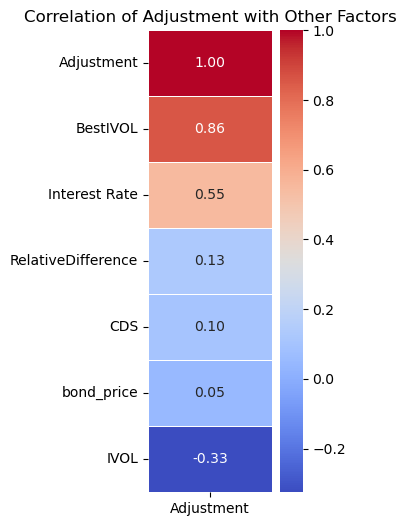

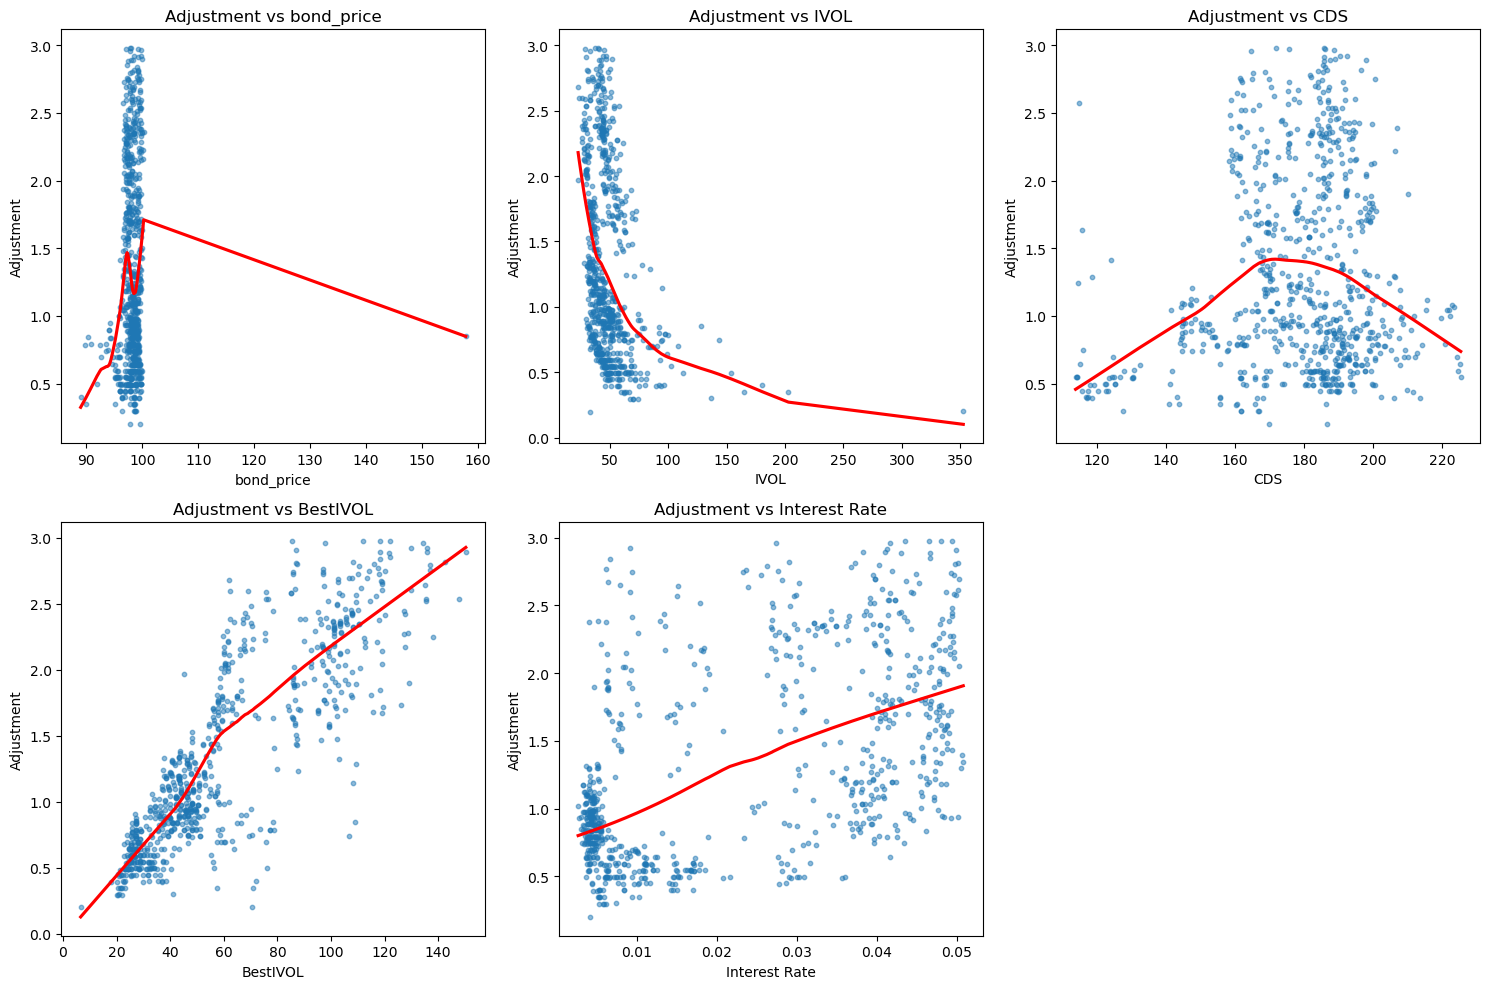

In [6]:
import seaborn as sns
import numpy as np

df1 = df.drop(df.columns[4:17], axis=1).set_index('date')

# 计算 Adjustment 与所有其他变量的相关性
correlation_matrix = df1.corr()

# 选出 Adjustment 的相关性数据
adjustment_corr = correlation_matrix[['Adjustment']].sort_values(by='Adjustment', ascending=False)

# 绘制相关性热图
plt.figure(figsize=(2, 6))
sns.heatmap(adjustment_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of Adjustment with Other Factors")
plt.show()




# 选择数值型变量（不包括 'Adjustment' 本身）
numeric_cols = df1.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if (col != 'Adjustment')&(col != 'RelativeDifference')]

# 计算子图的行列数，确保正方形排列
n = len(numeric_cols)
cols = int(np.ceil(np.sqrt(n)))  # 计算列数
rows = int(np.ceil(n / cols))  # 计算行数

# 创建子图
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 5))

# 逐个变量绘制散点图
for i, col in enumerate(numeric_cols):
    row, col_idx = divmod(i, cols)  # 计算子图的行、列索引
    ax = axes[row, col_idx]  # 选择正确的子图

    # 画散点图 + 低阶平滑曲线 (LOWESS)
    sns.regplot(x=df1[col], y=df1['Adjustment'], ax=ax, lowess=True, scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'})

    # 设置标题和标签
    ax.set_xlabel(col)
    ax.set_ylabel("Adjustment")
    ax.set_title(f"Adjustment vs {col}")

# 移除多余的空白子图（如果变量数不足填满正方形）
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])  # 删除空子图

plt.tight_layout()  # 调整子图布局，防止重叠
plt.show()


In [7]:
df1[df1['bond_price']>100]

,bond_price,IVOL,CDS,BestIVOL,Adjustment,Interest Rate,RelativeDifference
date,,,,,,,
2023-05-04,157.866,54.0814,166.3,45.9,0.848721,0.036909,-0.424628
2024-01-16,100.231,28.5390,194.6,67.3,2.358177,0.040350,-0.077184
2024-01-17,100.065,31.3338,195.1,67.7,2.160606,0.041359,-0.077386
2024-02-01,100.090,33.9500,187.5,75.5,2.223859,0.039673,-0.071027


# Relative Difference

数据有严重离群点
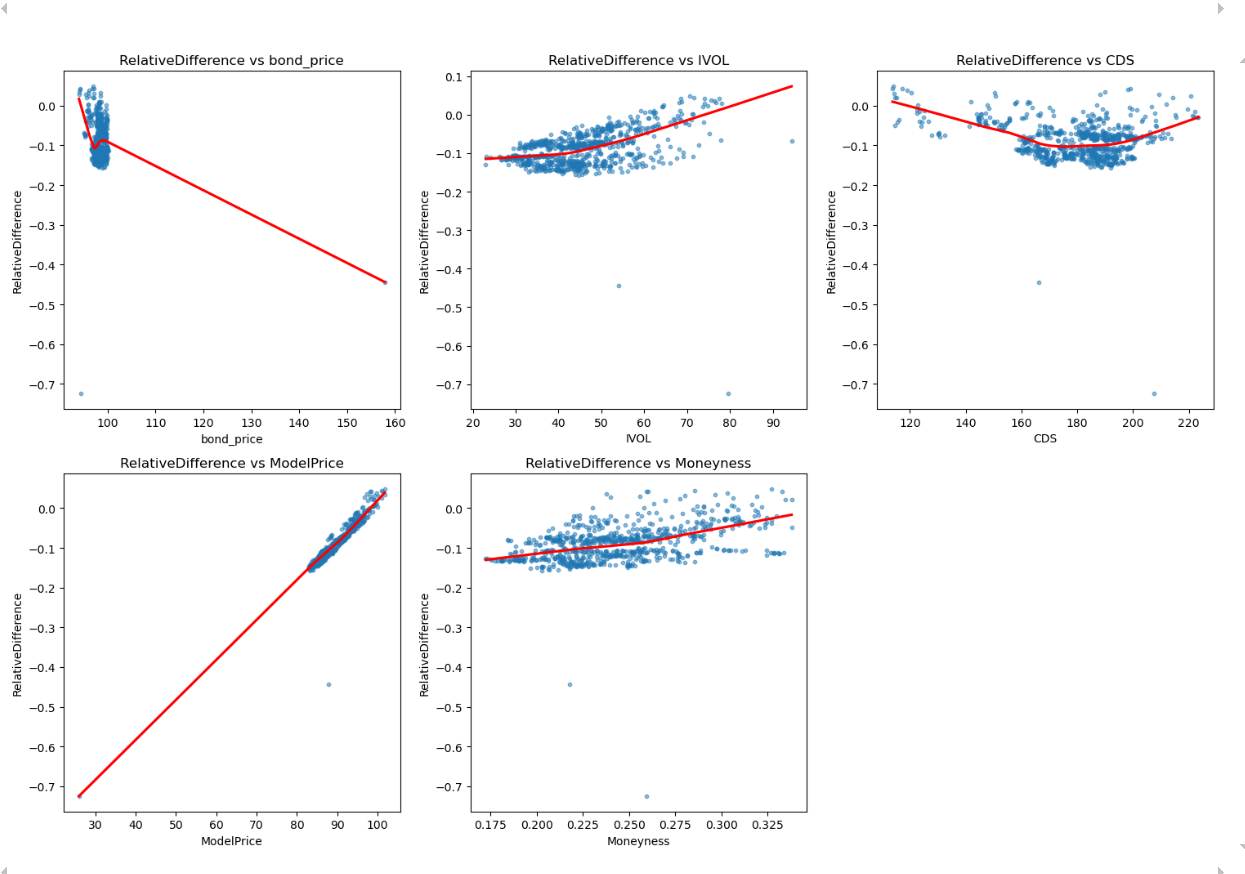

In [1]:
def draw_corr_plots(df,target_col):
    # 计算 Adjustment 与所有其他变量的相关性
    correlation_matrix = df.corr()

    # 选出 Adjustment 的相关性数据
    adjustment_corr = correlation_matrix[[target_col]].sort_values(by=target_col, ascending=False)

    # 绘制相关性热图
    plt.figure(figsize=(2, 6))
    sns.heatmap(adjustment_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation of  with Other Factors")
    plt.show()

    # 画 Adjustment 的折线图
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df[target_col], label=target_col, color='r', linestyle='-')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.title(target_col+' over Time')
    plt.legend()
    plt.show()

    # 选择数值型变量（不包括 'Adjustment' 本身）
    numeric_cols = df.select_dtypes(include=['number']).columns
    numeric_cols = [col for col in numeric_cols if col not in [target_col,'RelativeDifference']]

    # 计算子图的行列数，确保正方形排列
    n = len(numeric_cols)
    cols = int(np.ceil(np.sqrt(n)))  # 计算列数
    rows = int(np.ceil(n / cols))  # 计算行数

    # 创建子图
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 5))

    # 逐个变量绘制散点图
    for i, col in enumerate(numeric_cols):
        row, col_idx = divmod(i, cols)  # 计算子图的行、列索引
        ax = axes[row, col_idx]  # 选择正确的子图

        # 画散点图 + 低阶平滑曲线 (LOWESS)
        sns.regplot(x=df[col], y=df[target_col], ax=ax, lowess=True, scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'})

        # 设置标题和标签
        ax.set_xlabel(col,fontsize = 15)
        ax.set_ylabel(target_col,fontsize = 15)
        ax.set_title(target_col+ f" vs {col}",fontsize = 15)

    # 移除多余的空白子图（如果变量数不足填满正方形）
    for j in range(i + 1, rows * cols):
        row, col_idx = divmod(j, cols)
        fig.delaxes(axes[row, col_idx])  # 删除空子图

    plt.tight_layout()  # 调整子图布局，防止重叠
    plt.show()



# Compare error before and after adding call and put

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "TF results with call and put/TEVA 0 ¼ 02 01 26 Corp.xlsx"  # 修改为你的文件路径
df1 = pd.read_excel(file_path)
df1 = df1.drop(df1.columns[4:16], axis=1).set_index('date')
df1['RelativeDifference'] = (df1['ModelPrice']-df1['bond_price'])/df1['bond_price']
df1[df1['RelativeDifference']<-0.5]

,bond_price,IVOL,CDS,12,ModelPrice,RelativeDifference
date,,,,,,


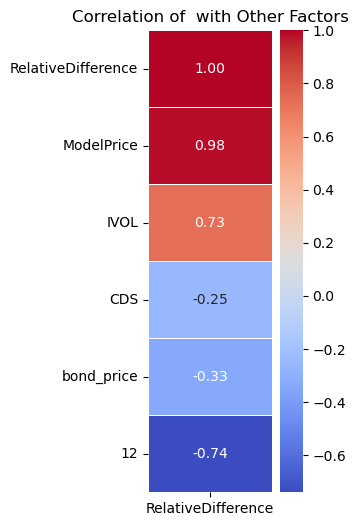

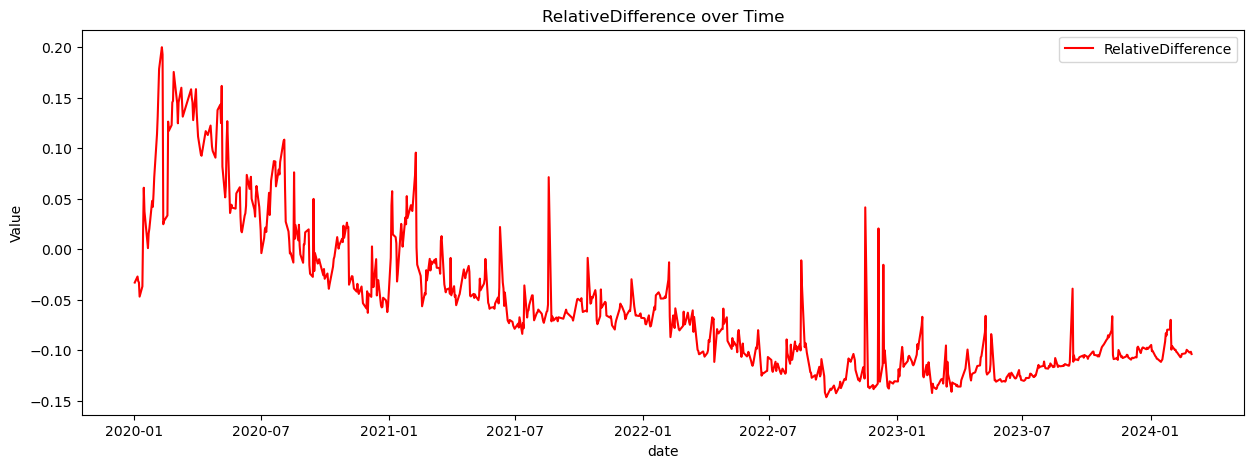

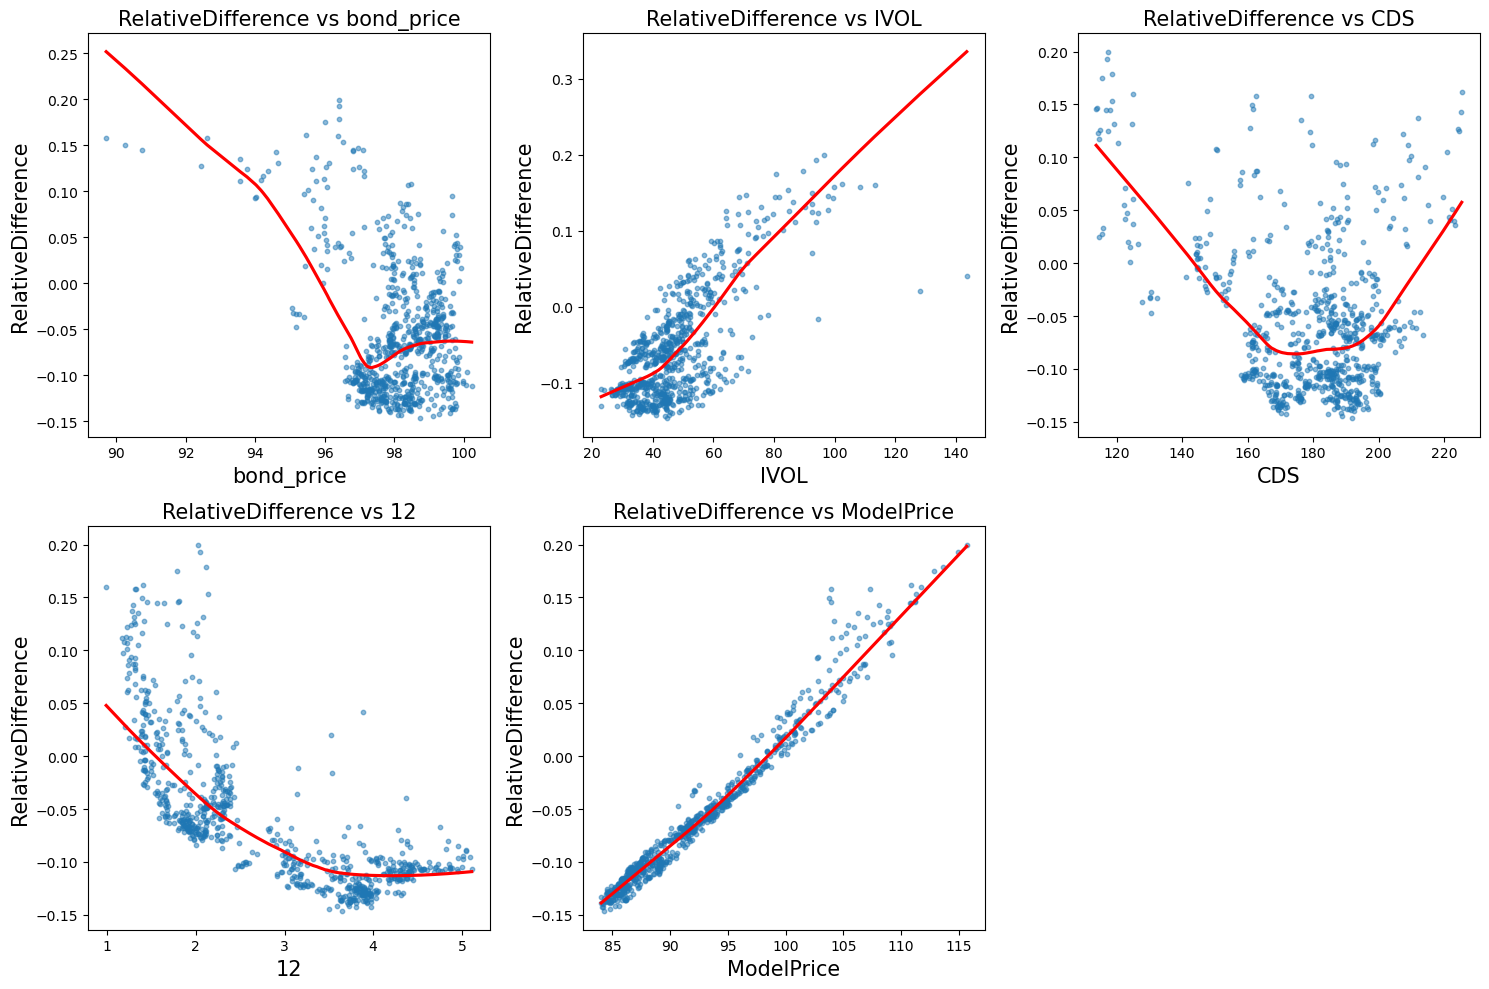

In [4]:
# 先去掉outlier
df1 = df1[abs(df1['RelativeDifference'])<0.3]
draw_corr_plots(df1,'RelativeDifference')


In [ ]:
file_path = "TF results/TEVA 0 ¼ 02 01 26 Corp.xlsx"  # 修改为你的文件路径
df = pd.read_excel(file_path)
df = df.drop(df.columns[5:17], axis=1).set_index('date')

df['RelativeDifference'] = (df['ModelPrice']-df['bond_price'])/df['bond_price']
df[abs(df['RelativeDifference'])>0.3]

,bond_price,IVOL,CDS,S,ModelPrice,RelativeDifference
date,,,,,,
2020-02-06,96.416,89.6120,118.5,12.12,3.056048e+01,-6.830352e-01
2020-03-11,94.665,90.0777,124.7,9.01,4.280786e+239,4.522037e+237
2023-05-04,157.866,54.0814,166.3,8.67,8.785503e+01,-4.434835e-01


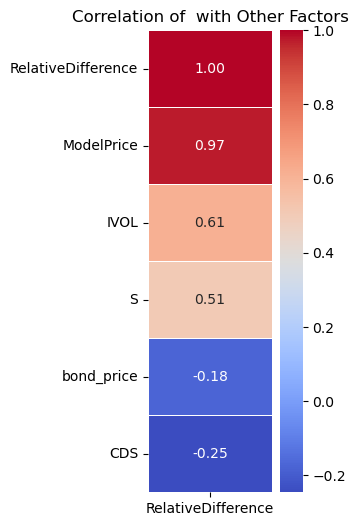

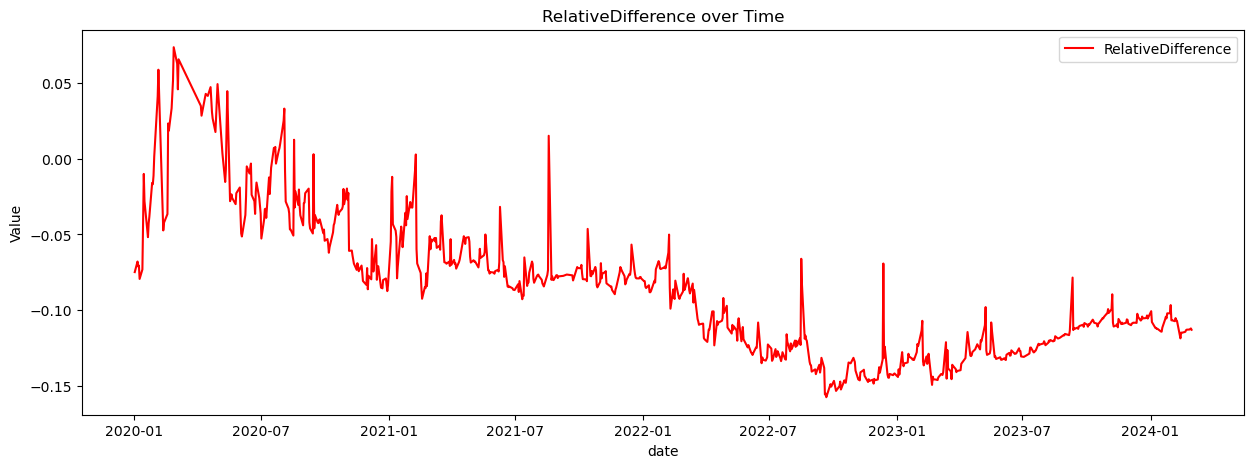

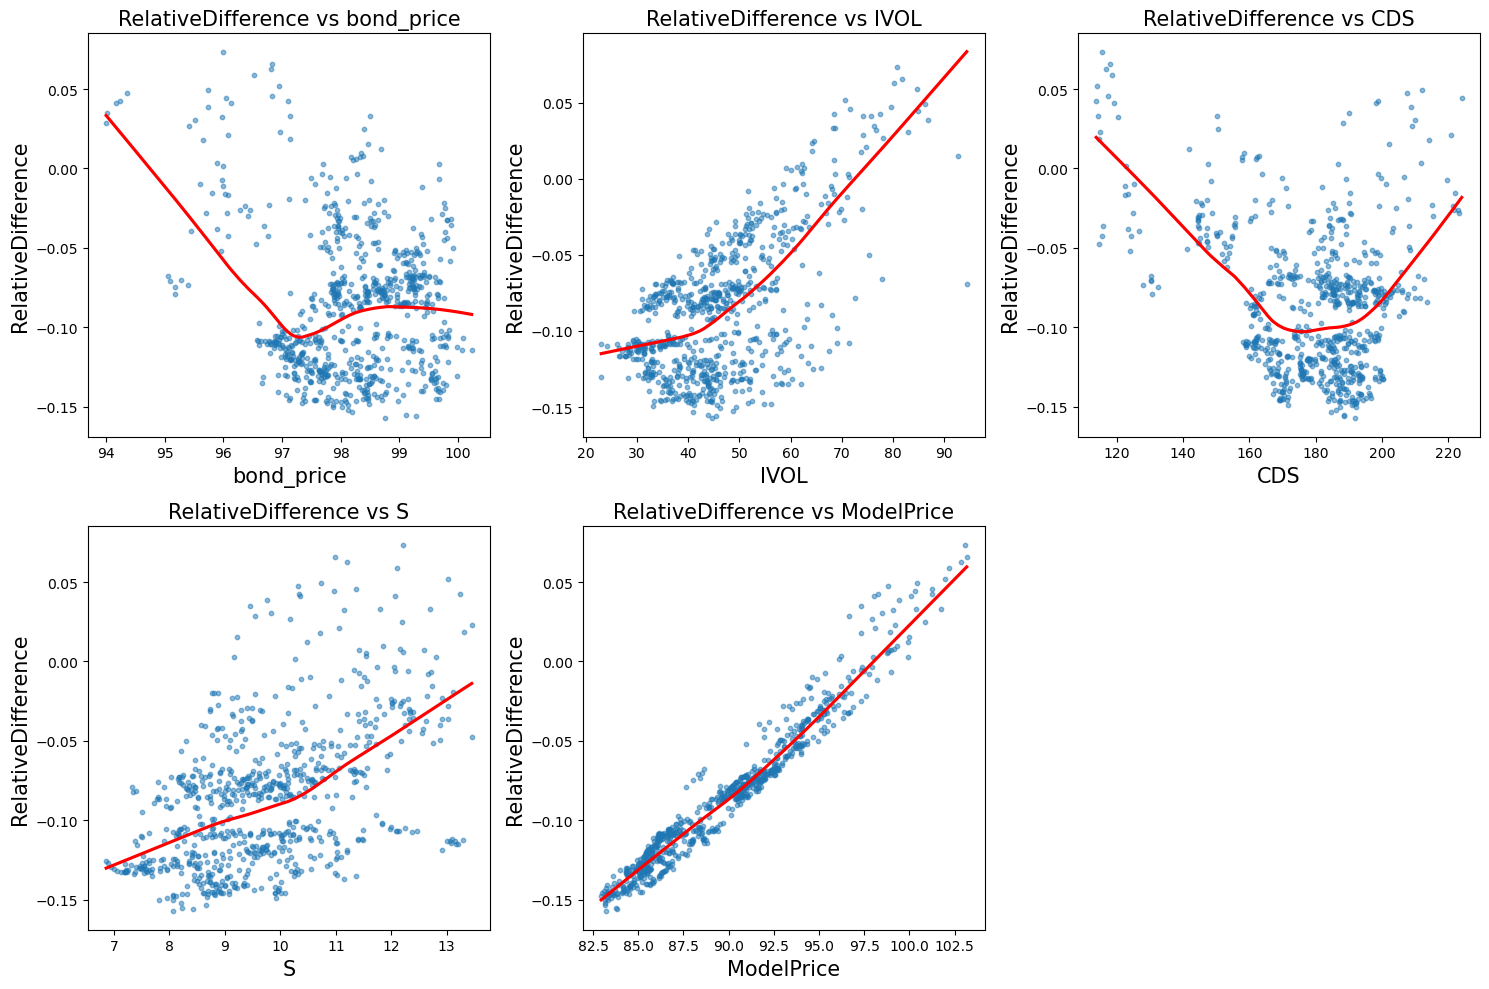

In [ ]:
# 先去掉outlier
df = df[abs(df['RelativeDifference'])<0.3]
draw_corr_plots(df,'RelativeDifference')

In [2]:
# 画 Adjustment 的折线图
target_col = 'RelativeDifference'
plt.figure(figsize=(15, 5))
plt.plot(df1.index, df1[target_col], label='After', color='r', linestyle='-')
plt.plot(df.index, df[target_col], label='Before', color='b', linestyle='-')
plt.xlabel('date')
plt.ylabel('Value')
plt.title(target_col+' over Time')
plt.legend()
plt.show()

KeyError: 'RelativeDifference'

<Figure size 1500x500 with 0 Axes>

## using regression to deal with proportional error in modelprice

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = df.dropna(subset=['ModelPrice', 'RelativeDifference','bond_price'])

# Define independent (X) and dependent (y) variables
#X = df[['ModelPrice','bond_price']]
X = df['ModelPrice']
y = df['RelativeDifference']

# Add constant for intercept in linear regression
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Extract model parameters (coefficients)
params = model.params
# Construct the regression equation as a string
regression_equation = f"RelativeDifference = {params['const']:.4f}" + f" + ({params['ModelPrice']:.4f} * {'ModelPrice'})"
# Print the regression equation
print('\nRegression result:')
print(regression_equation)

print('\nModel Summary:')
print(model.summary())

# Predict adjusted RelativeDifference
df['AdjustedRelativeDifference'] = (df['ModelPrice']/(1+model.predict(X)) - df['bond_price'])/df['bond_price']

df


Regression result:
RelativeDifference = -0.9833 + (0.0100 * ModelPrice)

Model Summary:
                            OLS Regression Results                            
Dep. Variable:     RelativeDifference   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     6816.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:38:44   Log-Likelihood:                 2071.8
No. Observations:                 755   AIC:                            -4140.
Df Residuals:                     753   BIC:                            -4130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

,bond_price,IVOL,CDS,ModelPrice,Moneyness,RelativeDifference,AdjustedRelativeDifference
date,,,,,,,
2020-01-02,95.180,49.2886,132.4,88.051093,0.240297,-0.074899,0.031917
2020-01-06,95.062,52.0959,130.4,88.606744,0.227981,-0.067906,0.033319
2020-01-07,95.085,50.9317,130.2,88.427005,0.228735,-0.070022,0.033030
2020-01-08,95.270,53.1910,130.3,88.430999,0.224210,-0.071785,0.031025
2020-01-09,95.169,48.1476,130.6,87.613801,0.226724,-0.079387,0.031941
...,...,...,...,...,...,...,...
2024-02-21,99.226,32.8845,184.6,88.000157,0.326764,-0.113134,-0.010170
2024-02-22,99.167,33.1347,184.4,87.959612,0.328021,-0.113015,-0.009590
2024-02-26,99.153,30.9735,184.1,87.980650,0.334053,-0.112678,-0.009446


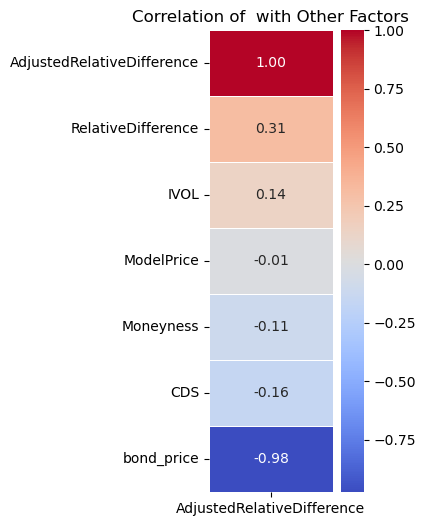

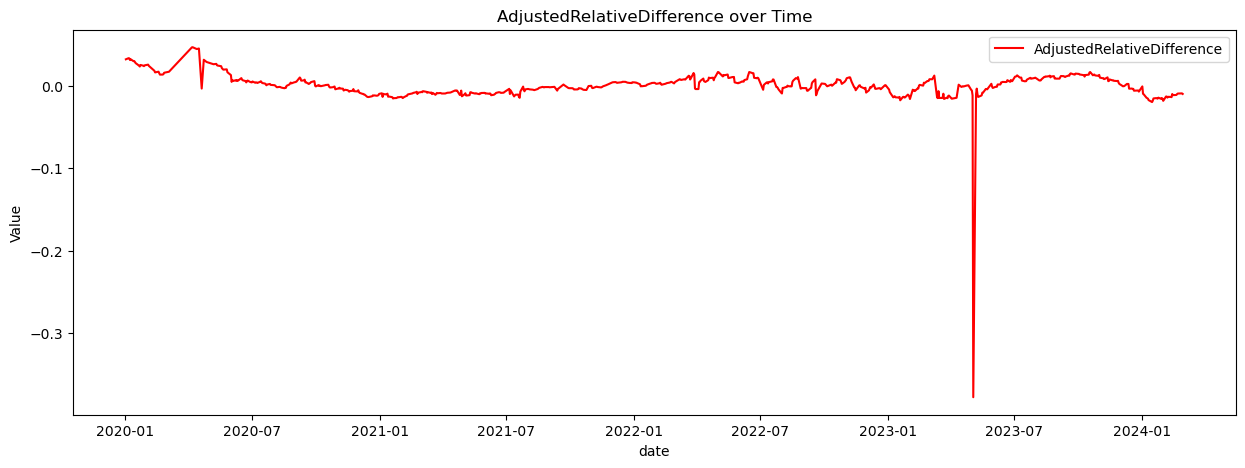

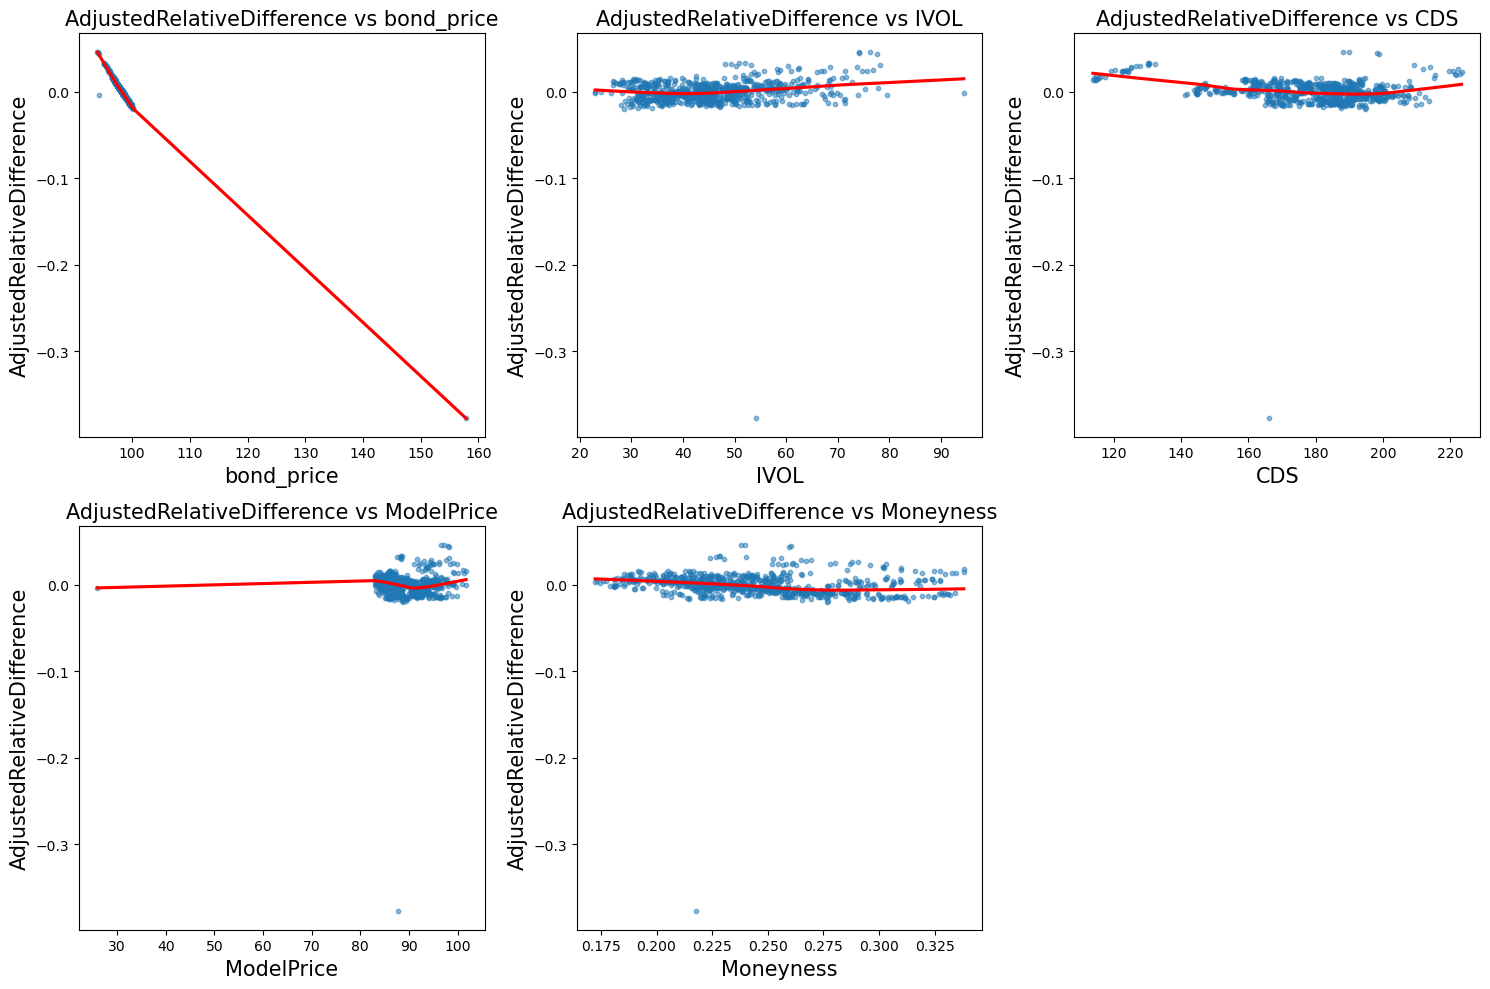

In [7]:
draw_corr_plots(df,'AdjustedRelativeDifference')

In [17]:
df[abs(df['RelativeDifference'])>0.3]

,Unnamed: 0,date,bond_price,IVOL,CDS,S,ModelPrice,RelativeDifference
20,20,2020-02-10,96.421,96.6136,117.4,12.35,31.353258,-0.674830
32,32,2020-03-04,96.821,71.5311,117.3,11.37,28.651021,-0.704083
33,33,2020-03-05,96.823,81.7486,118.1,10.98,27.388537,-0.717128
35,35,2020-03-11,94.665,90.0777,124.7,9.01,22.870924,-0.758401
38,38,2020-03-17,91.874,153.7966,141.2,7.34,18.256911,-0.801283
39,39,2020-03-18,89.866,202.9552,143.8,6.69,16.683407,-0.814352
44,44,2020-03-26,92.426,97.7521,160.6,7.90,19.978822,-0.783840
49,49,2020-04-06,94.021,76.2715,190.0,9.46,23.925168,-0.745534
50,50,2020-04-07,94.003,74.0722,188.2,9.54,23.925168,-0.745485
51,51,2020-04-13,94.231,77.5258,198.9,10.33,26.181682,-0.722154


## Select some points which has similar feature values with outlier
and we can found: the outlier **is**  an anomaly!!

In [ ]:
df['a'] = abs(df['IVOL']/54-1)+abs(df['CDS']/166-1) + abs(df['Moneyness']/0.217-1)
df.sort_values(by='a',ascending=1)

,bond_price,IVOL,CDS,ModelPrice,Moneyness,RelativeDifference,AdjustedRelativeDifference,a
date,,,,,,,,
2023-05-04,157.866,54.0814,166.3,87.810466,0.217927,-0.443766,-0.377872,0.007584
2022-02-01,97.999,53.8634,165.7,90.847192,0.218932,-0.072978,0.002810,0.013240
2022-02-02,98.052,54.5623,165.8,91.077155,0.219435,-0.071134,0.002314,0.022837
2022-01-31,97.936,54.8200,166.5,90.817468,0.211894,-0.072686,0.003449,0.041727
2022-02-03,98.055,56.0048,165.9,90.952911,0.215413,-0.072430,0.002258,0.045042
...,...,...,...,...,...,...,...,...
2020-02-04,96.129,75.6653,119.1,99.819502,0.303137,0.038391,0.023985,1.080682
2024-02-29,99.216,29.9214,185.6,88.012040,0.330534,-0.112925,-0.010068,1.087173
2024-02-14,99.223,28.7635,186.1,87.833462,0.331037,-0.114787,-0.010175,1.113944


Make a comparison

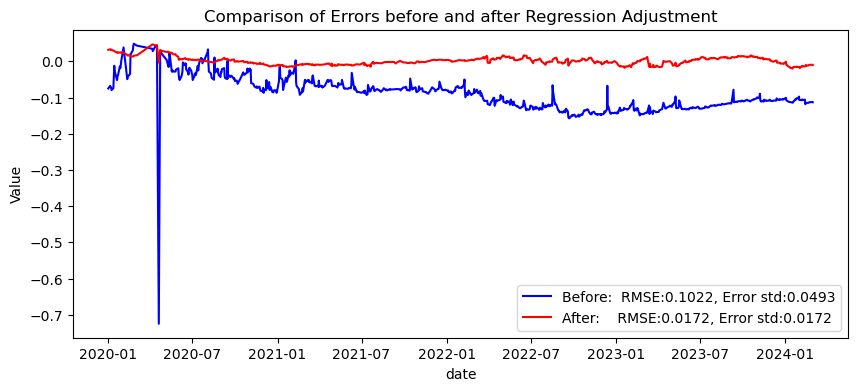

In [ ]:
RMSE0 = np.sqrt(np.mean(df['RelativeDifference']**2))
RMSE1 = np.sqrt(np.mean(df['AdjustedRelativeDifference']**2))
redisual_variance0 = np.std(df['RelativeDifference'])
redisual_variance1 = np.std(df['AdjustedRelativeDifference'])

#remove the outlier in the middle because it's wrong
df = df[abs(df['AdjustedRelativeDifference'])<0.3]

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['RelativeDifference'], label=f'Before:  RMSE:{RMSE0:.4f}, Error std:{redisual_variance0:.4f}', color='b', linestyle='-')
plt.plot(df.index, df['AdjustedRelativeDifference'], label= f'After:    RMSE:{RMSE1:.4f}, Error std:{redisual_variance1:.4f}', color='r', linestyle='-')
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Comparison of Errors before and after Regression Adjustment')
plt.legend()
plt.show()

remove outlier and draw

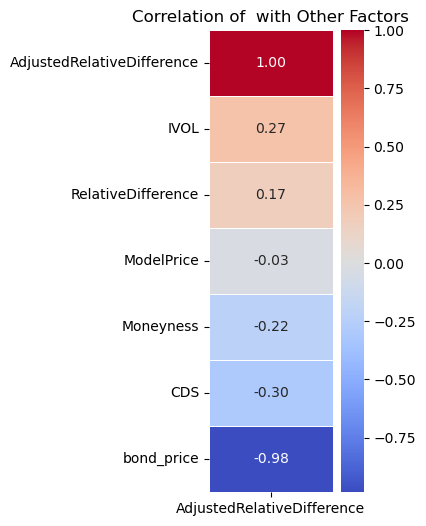

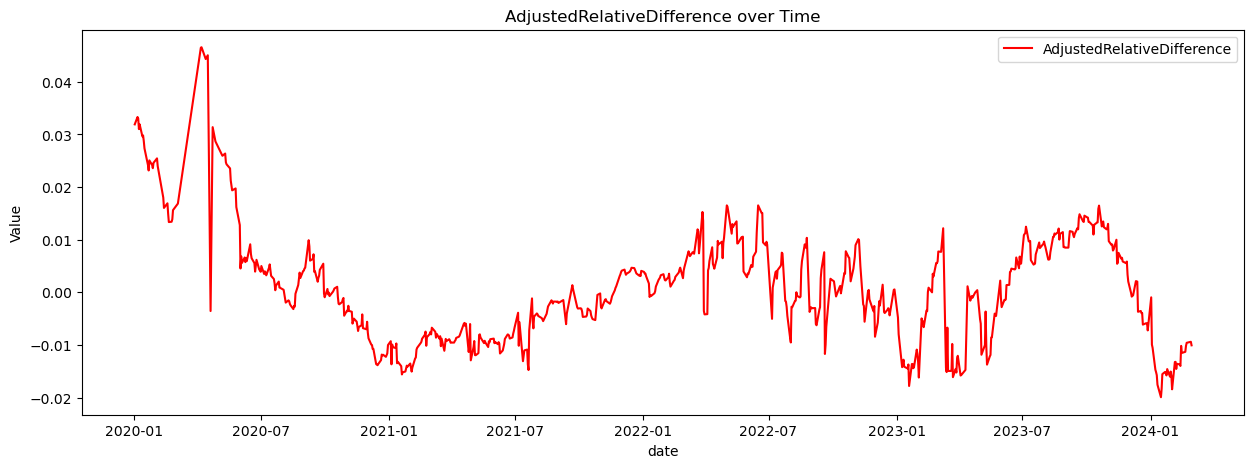

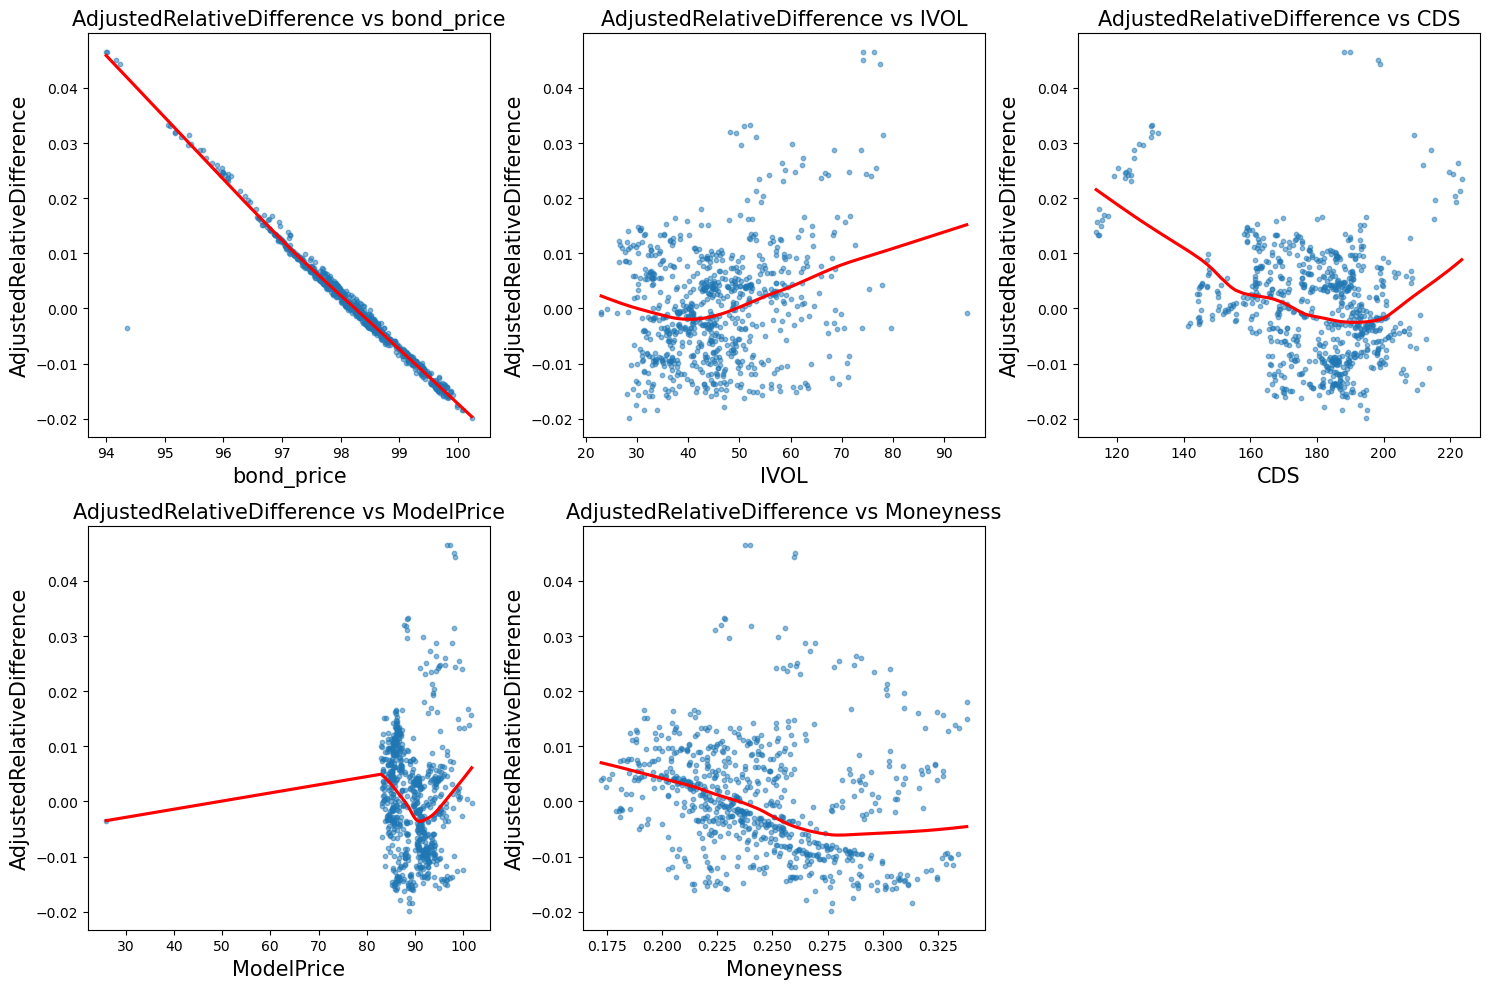

In [10]:
draw_corr_plots(df[abs(df['AdjustedRelativeDifference'])<0.3],'AdjustedRelativeDifference')

# Adjust IV input OR Adjust ModelPrice with IV?
I think the first one

In [11]:
pd.read_excel(file_path)

,date,bond_price,IVOL,CDS,S,1,2,3,4,5,6,7,8,9,10,11,12,ModelPrice,Moneyness
0,2020-01-02,95.180,49.2886,132.4,9.56,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33,88.051093,0.240297
1,2020-01-06,95.062,52.0959,130.4,9.07,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28,88.606744,0.227981
2,2020-01-07,95.085,50.9317,130.2,9.10,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31,88.427005,0.228735
3,2020-01-08,95.270,53.1910,130.3,8.92,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35,88.430999,0.224210
4,2020-01-09,95.169,48.1476,130.6,9.02,1.53,1.55,1.54,1.56,1.54,1.58,1.59,1.65,1.77,1.85,2.17,2.38,87.613801,0.226724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,2024-02-21,99.226,32.8845,184.6,13.00,5.50,5.50,5.44,5.32,4.98,4.64,4.43,4.30,4.33,4.32,4.59,4.49,88.000157,0.326764
784,2024-02-22,99.167,33.1347,184.4,13.05,5.49,5.51,5.45,5.32,5.02,4.69,4.49,4.33,4.35,4.33,4.58,4.47,87.959612,0.328021
785,2024-02-26,99.153,30.9735,184.1,13.29,5.50,5.52,5.47,5.34,5.03,4.69,4.48,4.29,4.32,4.28,4.53,4.40,87.980650,0.334053
786,2024-02-28,99.149,31.1031,185.4,13.09,5.50,5.51,5.45,5.31,5.00,4.64,4.44,4.26,4.28,4.27,4.53,4.40,88.030273,0.329026


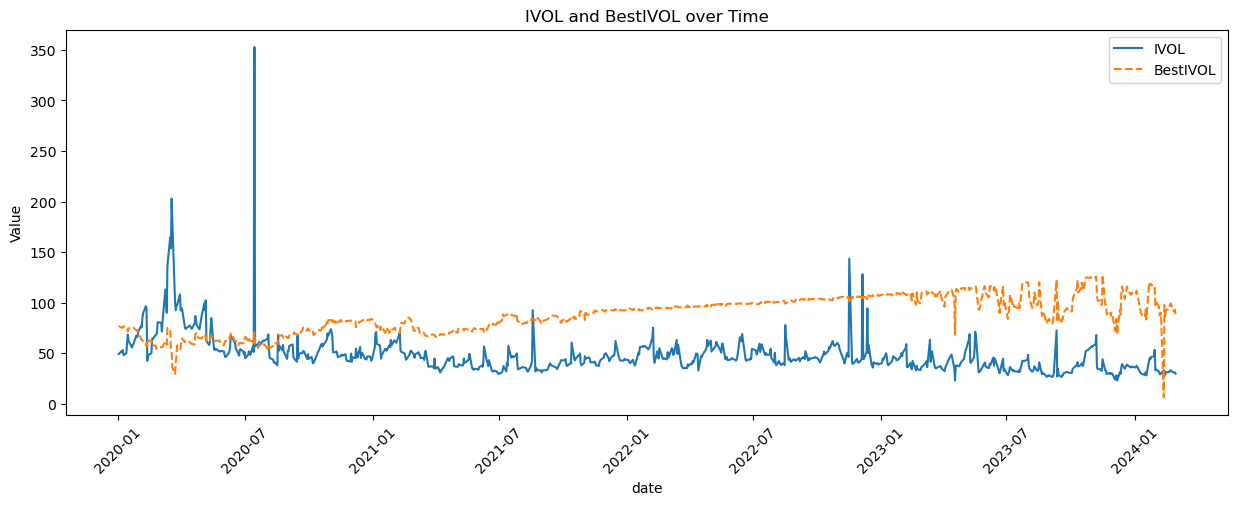

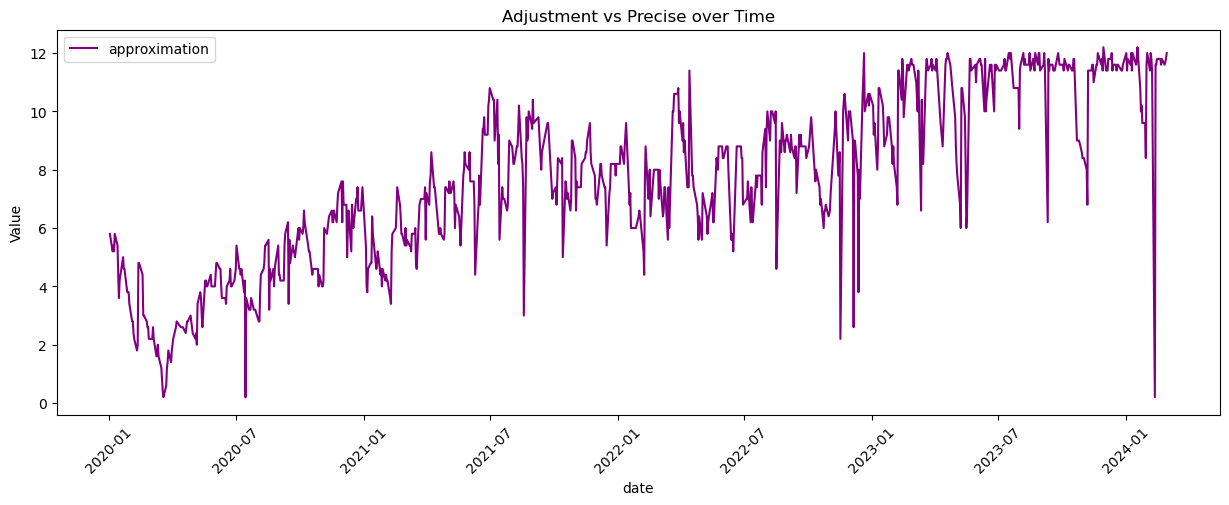

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel数据
file_path = "TF calibration results/TEVA 0 ¼ 02 01 26 Corp.xlsx"  # 修改为你的文件路径
adjustment_df = pd.read_excel(file_path)

# 确保Date列是时间格式
adjustment_df['date'] = pd.to_datetime(adjustment_df['date'])

def draw_curve_IV(df):
    # 画 IVOL 和 BestIVOL 的折线图
    plt.figure(figsize=(15, 5))
    plt.plot(df['date'], df['IVOL'], label='IVOL', linestyle='-')
    plt.plot(df['date'], df['BestIVOL'], label='BestIVOL', linestyle='--')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.title('IVOL and BestIVOL over Time')
    plt.legend()
    plt.xticks(rotation=45)  # 旋转 x 轴标签
    plt.show()

    # 画 Adjustment 的折线图
    plt.figure(figsize=(15, 5))
    plt.plot(df['date'], df['Adjustment'], label='approximation', color='purple', linestyle='-')
    #plt.scatter(df['date'], df['Adjustment(precise)'], label='precise', color='b', linestyle='-')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.title('Adjustment vs Precise over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

draw_curve_IV(adjustment_df)

In [14]:
# remove the interest rate columns
a = params['ModelPrice'] # slope 
b = params['const'] # intercept

def new_modelprice(X):
    """计算回归预测值 y = ax + b"""
    RDestimate =  a * X + b
    return X/(1+RDestimate)

relative difference is error of calibration? or error of original model price?  
离群点有两个，一个-0.7，一个-0.3。0.7的被第一次回归解决了，但是0.3的没有

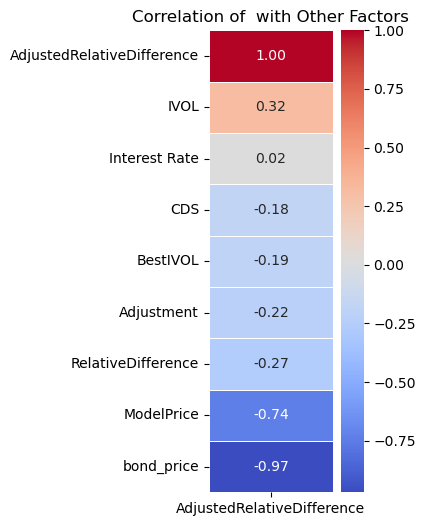

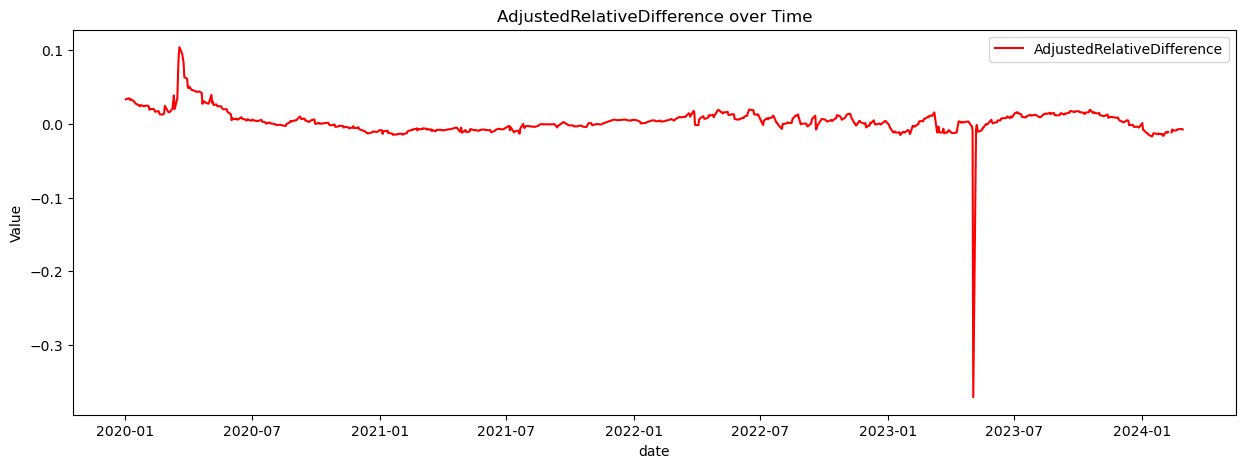

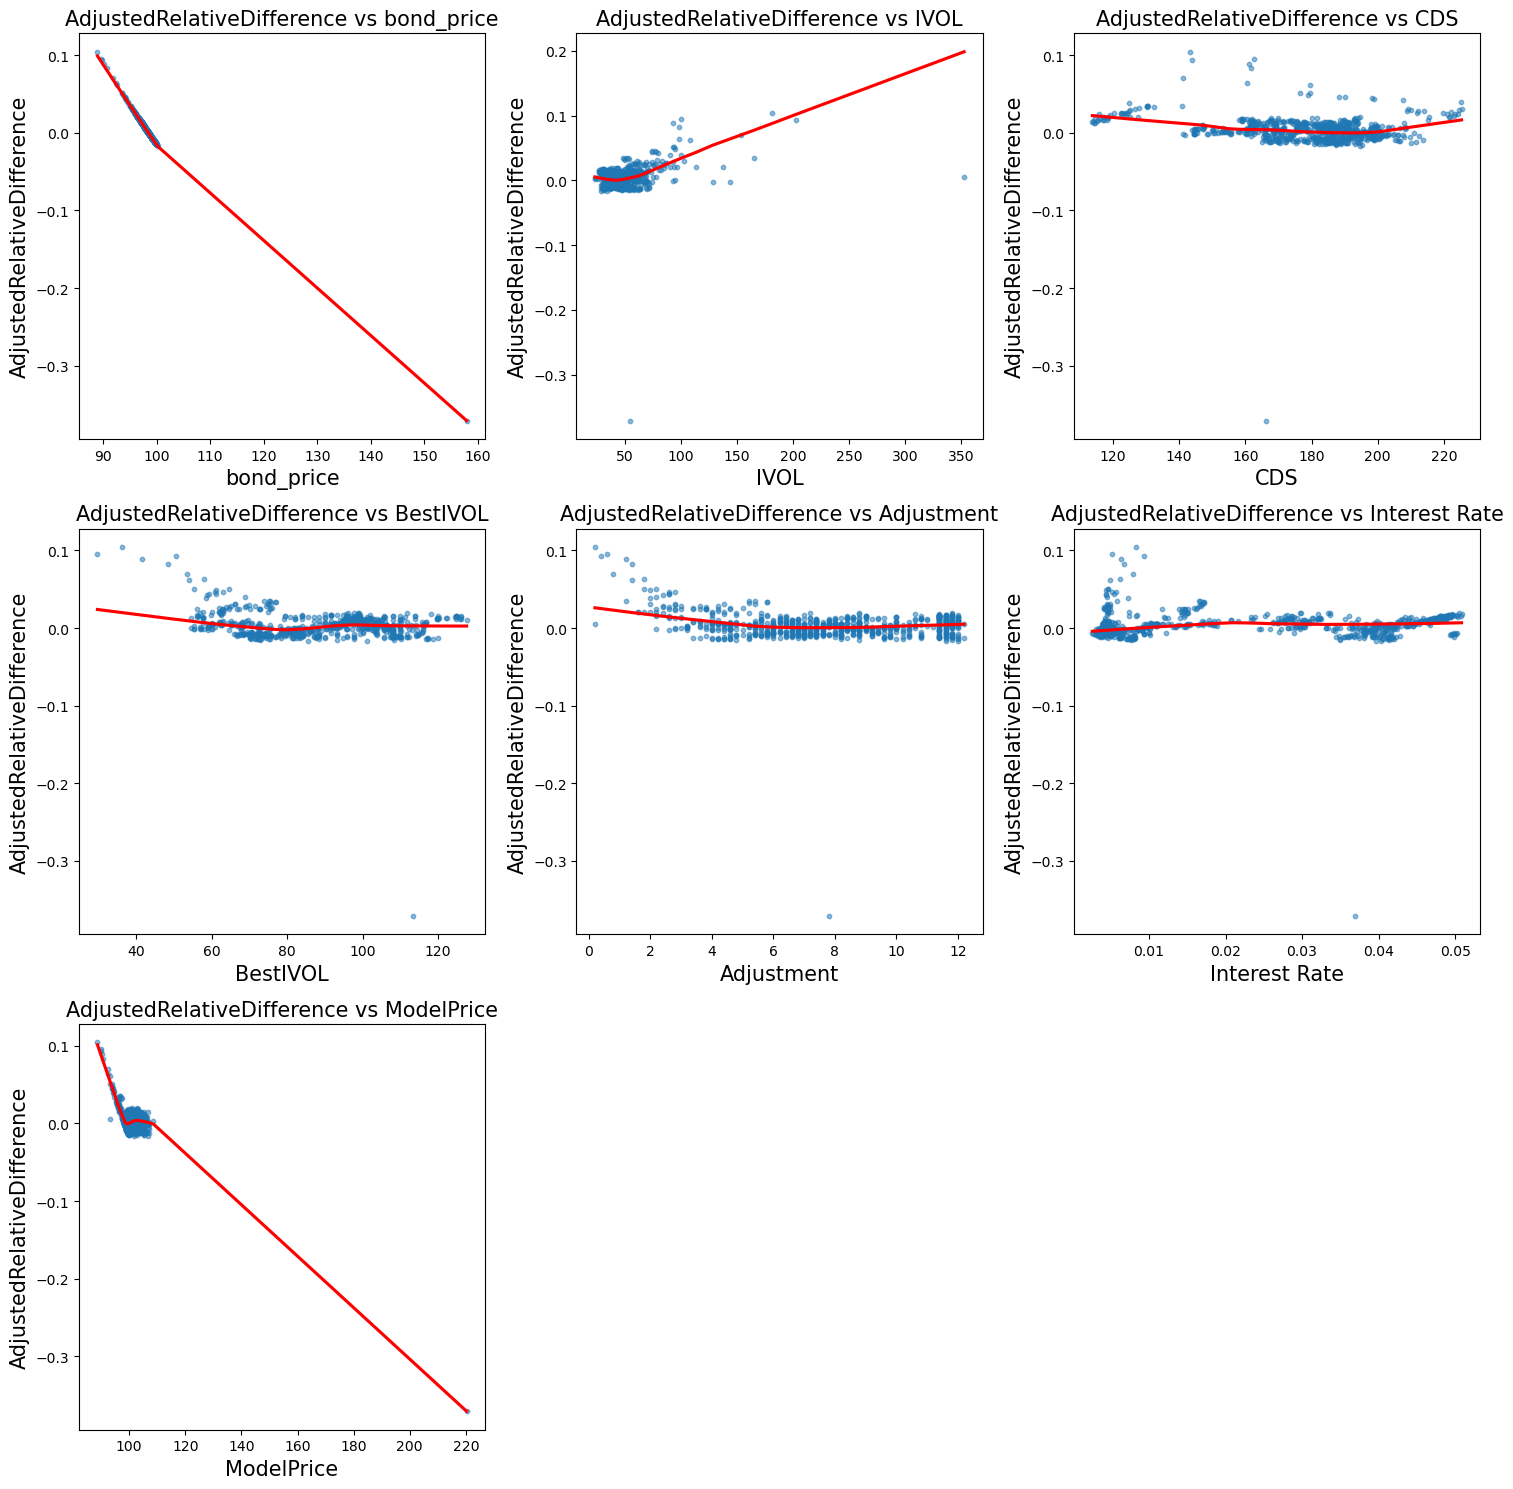

In [15]:

# remove 没用的利率列
adjustment_df = adjustment_df.drop(adjustment_df.columns[4:17], axis=1).set_index('date')
adjustment_df['ModelPrice'] = adjustment_df['bond_price']*(adjustment_df['RelativeDifference']+1)
adjustment_df['AdjustedRelativeDifference'] = (new_modelprice(adjustment_df['ModelPrice']) - adjustment_df['bond_price'])/adjustment_df['bond_price']

draw_corr_plots(adjustment_df,'AdjustedRelativeDifference')

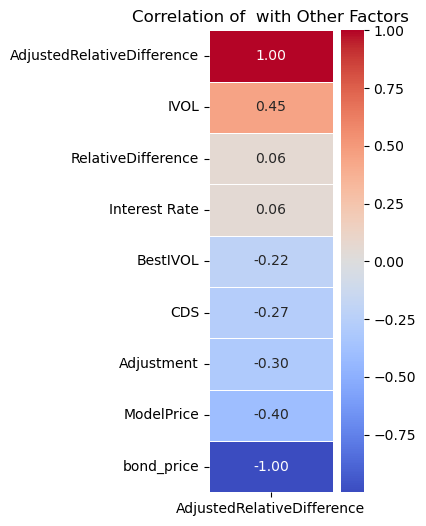

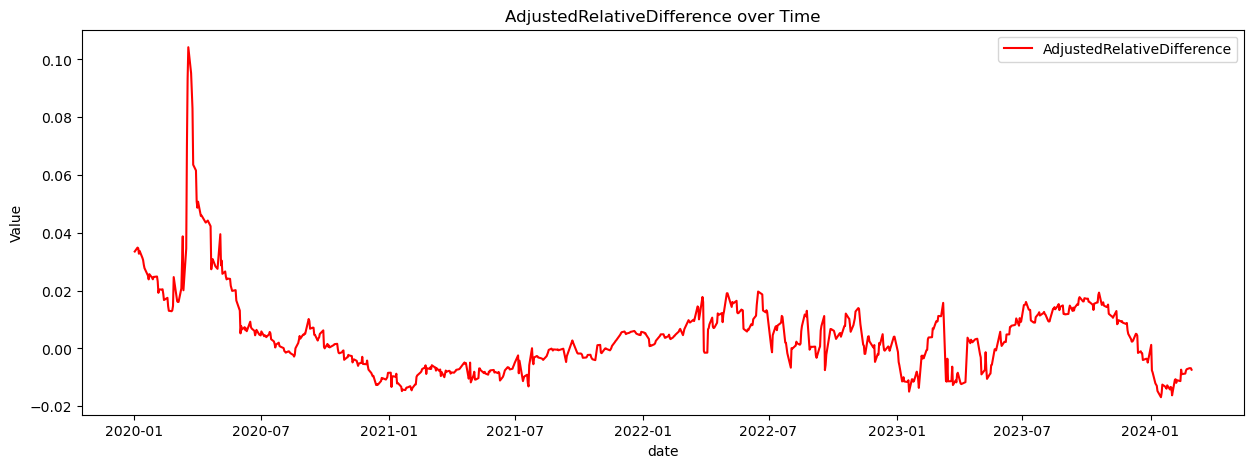

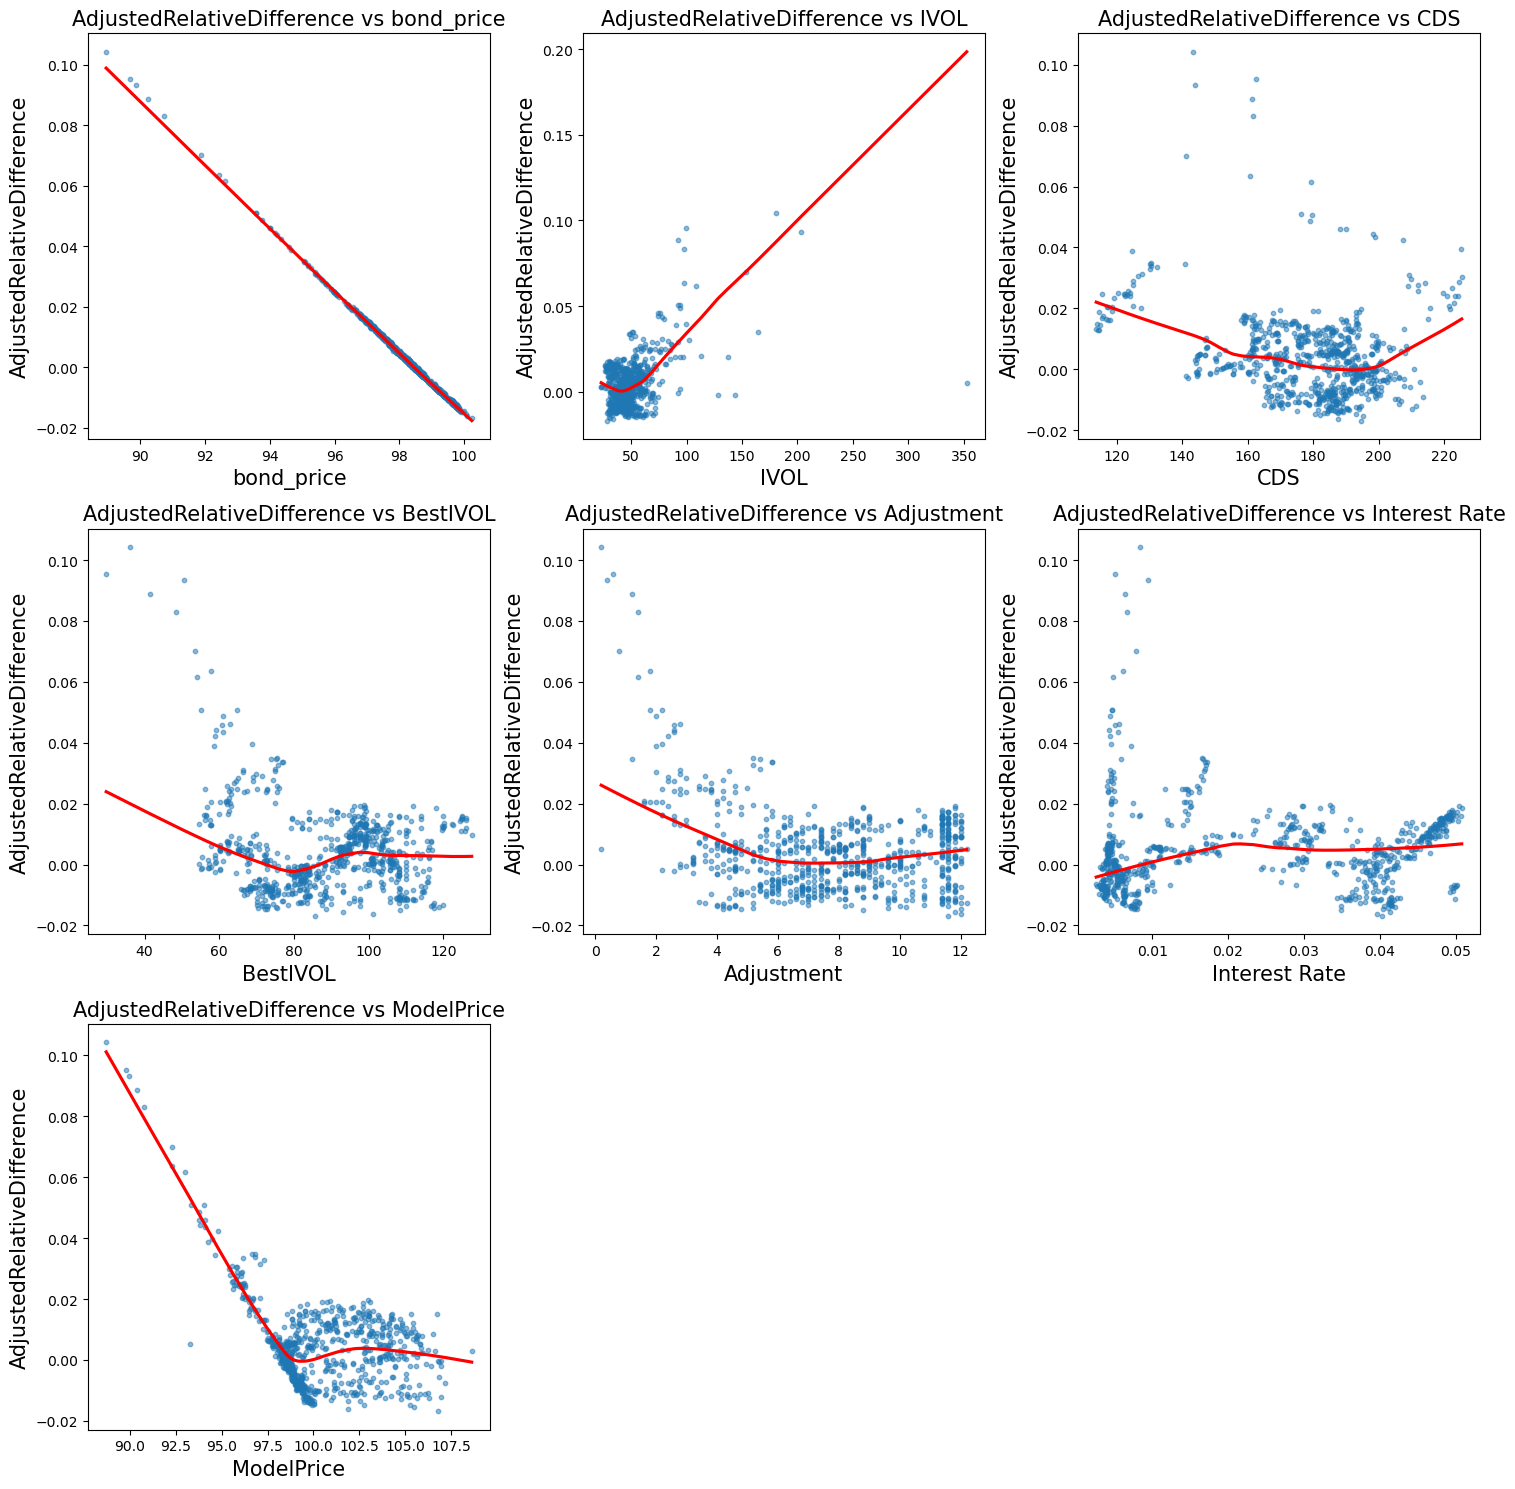

In [16]:
adjustment_df['ModelPrice'] = adjustment_df['bond_price']*(adjustment_df['RelativeDifference']+1)
adjustment_df['AdjustedRelativeDifference'] = (new_modelprice(adjustment_df['ModelPrice']) - adjustment_df['bond_price'])/adjustment_df['bond_price']

draw_corr_plots(adjustment_df[abs(adjustment_df['AdjustedRelativeDifference'])<0.25],'AdjustedRelativeDifference')